### <b>AN ANALYSIS OF THE DISTRIBUTION OF JUMIA KENYA OFFERS ACROSS ITS PRODUCT CATEGORIES.</b>

                                         by

                                Jacktone Etemesi

                                Phone: +25408578181

                        email: jacktoneetemesi1@gmail.com


##### This project will utilize the following data science concepts.

1. <b>Data mining and web scraping
2. Database management.
3. Data cleaning
4. Data Visualization
5. Data analysis- Regression analysis</b>

## STEP 1: Mining Our Data

This section covers the following:

1. Creating an sqlite3 database to store the scraped data.
2. Scraping data from our target website (www.jumia.co.ke) using Beautifulsoup


In [87]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import sqlite3 as sql


In [88]:
#creating an sqlite3 database to save the scrapped data
conn=sql.connect('Offers.db')
curs=conn.cursor()
curs.execute('''CREATE TABLE IF NOT EXISTS Jumia_products (Name VACHAR, Brand VARCHAR, Category VARCHAR, Shipping TEXT, Price INT, Offer INT, Discount INT )''')


In [89]:
#creating a loop of all the urls containing offers.
'''Jumia has a total of 46 pages containing products on offer. We create a loop that fetches all these pages' urls and downloads the page content'''
def url_fetcher():
    base_url='https://www.jumia.co.ke/catalog/?q=offers'
    for id in range (1,47,1):
        if id==1:
            url=base_url
        else:
            url='https://www.jumia.co.ke/catalog/?q=offers&page={}#catalog-listing'.format(id)
        web_file=requests.get(url)
        soup=BeautifulSoup(web_file.text,'lxml')
        master=soup.find_all('a',class_='core')
        for product in master:
            try:
                name=product['data-name']
                brand=product['data-brand']
                category=product['data-category']
                img=product.find('img',class_='img')['data-src']
                shipping=product.find('div',class_='bdg _glb _xs').text
                offer=int(product.find('div',class_='prc').text.replace('KSh',' ').replace(',','').strip())
                price=int(product.find('div',class_='old').text.replace('KSh',' ').replace(',','').strip())
                discount=int(product.find('div',class_='bdg _dsct _sm').text.replace('%','').strip())
                curs.execute('''INSERT INTO Jumia_products (Name,Brand,Category,Shipping,Price,Offer,Discount) VALUES (?,?,?,?,?,?,?)''',(name,brand,category,shipping,price,offer,discount))
                #print(name,', ',brand,' ,',category,' ,',img,', ',shipping,', ',offer,', ',price,' ,',discount)
            except Exception as e:
                pass  
        if id <47:
            print(f'Scraping data from page {id}')      
    conn.commit()
url_fetcher()

Scraping data from page 1
Scraping data from page 2
Scraping data from page 3
Scraping data from page 4
Scraping data from page 5
Scraping data from page 6
Scraping data from page 7
Scraping data from page 8
Scraping data from page 9
Scraping data from page 10
Scraping data from page 11
Scraping data from page 12
Scraping data from page 13
Scraping data from page 14
Scraping data from page 15
Scraping data from page 16
Scraping data from page 17
Scraping data from page 18
Scraping data from page 19
Scraping data from page 20
Scraping data from page 21
Scraping data from page 22
Scraping data from page 23
Scraping data from page 24
Scraping data from page 25
Scraping data from page 26
Scraping data from page 27
Scraping data from page 28
Scraping data from page 29
Scraping data from page 30
Scraping data from page 31
Scraping data from page 32
Scraping data from page 33
Scraping data from page 34
Scraping data from page 35
Scraping data from page 36
Scraping data from page 37
Scraping d

In [90]:
results=curs.execute('''SELECT * FROM Jumia_products''').fetchall()
#print(results)


In [91]:
#Loading the database into a pandas dataframe for analysis
conn=sql.connect('Offers.db')
df=pd.read_sql_query('SELECT * FROM Jumia_products',conn)

In [92]:
# Creating a copy of the data frame for manipulation
jumia_offers=df.copy()
jumia_offers.drop_duplicates(inplace=True) #takes care of any duplicates that may arise from running the notebook more than once

## STEP 2: Exploratory Data Analysis

In this section we'll try to answer the following questions about our dataset.

1. How many rows and columns does our dataset have?
2. How many unique product categories does our dataset have?
3. What is our dataset's statistical summary?
4. What data types does each column have?

In [93]:
#Checking for the number of rows and columns
jumia_offers.shape
#Our dataset has 1,533 row entries and 7 columns

(1115, 7)

In [94]:
#Checking for columns and respective data types
jumia_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1539
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1115 non-null   object
 1   Brand     1115 non-null   object
 2   Category  1115 non-null   object
 3   Shipping  1115 non-null   object
 4   Price     1115 non-null   int64 
 5   Offer     1115 non-null   int64 
 6   Discount  1115 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 69.7+ KB


In [95]:
# Statistical summary
jumia_offers.describe()

,Price,Offer,Discount
count,1115.000000,1115.000000,1115.000000
mean,5939.849327,3760.712108,33.235874
std,8104.158760,4722.881014,12.225843
min,172.000000,86.000000,10.000000
25%,2042.000000,1475.000000,23.000000
50%,3545.000000,2289.000000,26.000000
75%,6148.000000,3971.500000,50.000000
max,78498.000000,39249.000000,50.000000


In [96]:
# Checking for unique product categories
jumia_offers['Category'].nunique()
#our dataset has 161 unique product categogies

161

In [97]:
#Checking how many times each category has been featured.
jumia_offers['Category'].value_counts()

Automobile/Motorcycle & Powersports/Accessories/Stands                                                192
Home & Office/Home & Kitchen/Home Decor/Home Décor Accents/Decorative Accessories/Decorative Bowls     97
Home & Office/Tools & Home Improvement/Power & Hand Tools/Gardening Tools                              75
Toys & Games/Learning & Education/Reading & Writing/Diaries, Journals & Notebooks                      36
Home & Office/Home & Kitchen/Kitchen & Dining/Bakeware/Bakers & Casseroles                             26
                                                                                                     ... 
Automobile/Replacement Parts/Belts, Hoses & Pulleys/Belts                                               1
Home & Office/Home & Kitchen/Kitchen & Dining/Kitchen Utensils & Gadgets                                1
Home & Office/Home & Furniture/Lighting/Lighting Bulbs & Component                                      1
Toys & Games/Hobbies/Remote & App Controlled V

## Step 3: Cleaning Our Data
Under this section, we will check our dataset for;
1. Missing values
2. Outliers
3. Structural errors

#### a. Checking for nulls

In [98]:
jumia_offers.isnull().sum()
#Our dataset has no missing values.

Name        0
Brand       0
Category    0
Shipping    0
Price       0
Offer       0
Discount    0
dtype: int64

#### b. Plotting for outliers
We will utilize scatter plots  and baxplots to check for outliers in the price and offer columns

In [99]:
import seaborn
import matplotlib
%matplotlib inline

<AxesSubplot:>

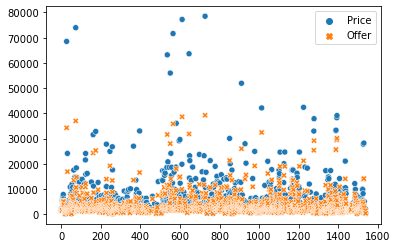

In [100]:
#Scatterplot1
seaborn.scatterplot(data=jumia_offers[['Price','Offer']])

<AxesSubplot:>

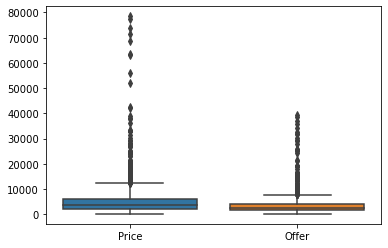

In [101]:
#Boxplot1
seaborn.boxplot(data=jumia_offers[['Price','Offer']])

From the two plots above, we can tell that the two numerical columns (price & offer) contain outliers.

#### C. Cleaning Outliers

Under this section, we will utilize the standard deviation technique to remove outliers from our data.

In [102]:
#Creating a custom function to check and filter out outliers from a given column
def std_outlier(df):
    avg=df.mean()
    std=df.std()
    upper_limit=avg+(3*std)
    lower_limit=avg-(3*std)
    clean_data=df[(df>lower_limit) & (df<upper_limit)]
    return clean_data
'''Our function calculates the series mean and standard deviation then uses them to set the upper and lower bounds in our data.
In this case we utilize '3 standard deviations' from the mean on both bounds.'''

"\nOur function calculates the series mean and standard deviation then uses them to set the upper and lower bounds in our data.\nIn this case we utilize '3 standard deviations' from the mean on both bounds."

In [103]:
clean_price=std_outlier(jumia_offers['Price'])

clean_offer=std_outlier(jumia_offers['Offer'])

#Running this cell once removes the least amount of outliers possible.
# If you want to increase the accuracy of 'cleaning' your data, you should run the cell multiple times.
# Check the boxplots and scatter plots below to verify the changes in your dataset

In [104]:
#Inserting the clean price and Offer values into our dataset
jumia_offers['Price']=clean_price
jumia_offers['Offer']=clean_offer

In [105]:
# Checking to see if the two columns have introduced any nulls in our dataset.
jumia_offers.isnull().sum()

Name         0
Brand        0
Category     0
Shipping     0
Price       21
Offer       26
Discount     0
dtype: int64

In [106]:
# Checking for entries whose values have been flagged as outliers.
jumia_offers[(jumia_offers['Price'].isnull()) | (jumia_offers['Offer'].isnull())]

,Name,Brand,Category,Shipping,Price,Offer,Discount
27,【Free Shp + R Deal + Limited Offer】800M Seah R...,Generic,Garden & Outdoors/Outdoor Power Tools/Metal De...,Shipped from abroad,NaN,NaN,50
73,【r Deal + Limited Offer】Variable Frequency Dri...,Generic,Home & Office/Tools & Home Improvement/Electri...,Shipped from abroad,NaN,NaN,50
161,銆? + Super Deal + Limited Offer銆?Green 4.3Inch...,Generic,Automobile/Motorcycle & Powersports/Accessorie...,Shipped from abroad,NaN,NaN,23
174,銆怱uper Deal + Limited Offer銆慥ariable Frequency...,Generic,Home & Office/Tools & Home Improvement/Power &...,Shipped from abroad,NaN,NaN,23
246,140X Tibet Tibetan D Buddhist Copper Water Off...,Generic,Home & Office/Home & Kitchen/Home Decor/Home D...,Shipped from abroad,24885.0,NaN,23
396,銆? + Super Deal + Limited Offer銆?DOT Approved ...,Generic,Automobile/Motorcycle & Powersports/Accessorie...,Shipped from abroad,NaN,16499.0,50
536,【r Deal + Limited Offer】Variable Frequency Dri...,Generic,Home & Office/Tools & Home Improvement/Electri...,Shipped from abroad,NaN,NaN,50
551,銆怓ree Shipping + Super Deal + Limited Offer銆?D...,Generic,Home & Office/Tools & Home Improvement/Power &...,Shipped from abroad,NaN,NaN,50
565,【r Deal + Limited Offer】Variable Frequency Dri...,Generic,Home & Office/Tools & Home Improvement/Electri...,Shipped from abroad,NaN,NaN,50
581,Buddha Utensils Special S Offer Temple Ornamen...,Generic,Home & Office/Home & Kitchen/Kitchen & Dining/...,Shipped from abroad,NaN,NaN,50


In [107]:
# Estimating the percentage of missing values
total_observations=np.product(jumia_offers.shape)
missing_observations=jumia_offers.isnull().sum().sum()
Null_ppercentage=(missing_observations/total_observations)*100
Null_ppercentage
#This percentage informs us on the technique to be used when handling nulls.

0.6021780909673287

#### d. Handling Missing values

In our case only 0.60% of our observations contains null values. This is a very small percentage and we can get away with dropping those values.

This percentage will vary depending on how many times you ran the outlier removal function.

If the percentage is significant, consider handling your missing values differently by filling them with column averages.


In [108]:
# Lets create another copy of our data set containing null values for future reference
clean_data=jumia_offers.copy()


In [109]:
# Dropping null values in our new dataset
clean_data.dropna(inplace=True)

<AxesSubplot:>

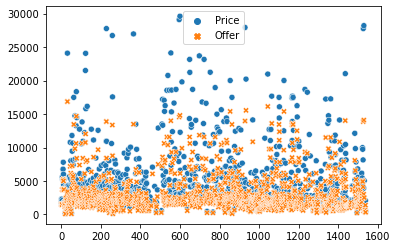

In [110]:
seaborn.scatterplot(data=clean_data[['Price','Offer']])

<AxesSubplot:>

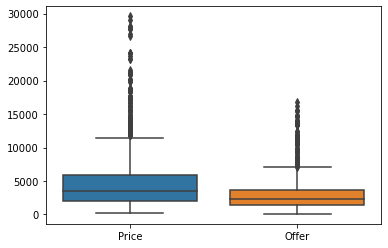

In [111]:
seaborn.boxplot(data=clean_data[['Price','Offer']])

In [112]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1539
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1088 non-null   object 
 1   Brand     1088 non-null   object 
 2   Category  1088 non-null   object 
 3   Shipping  1088 non-null   object 
 4   Price     1088 non-null   float64
 5   Offer     1088 non-null   float64
 6   Discount  1088 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 68.0+ KB


From the two plots above, we can tell that some outliers have been removed from the dataset. The .info() method indicates that the new number of row entries is 1,126.

#### e. Fixing Structural errors in strings

In this section we will clean our dataset by fixing structural/format issues in columns containing string values.

In [113]:
clean_data[['Name','Category']].tail()

,Name,Category
1535,Ast Deal + Limited Offerall Hooks Home Towel C...,Home & Office/Tools & Home Improvement/Hardwar...
1536,Ast Deal + Limited Offerall Hooks Home Towel C...,Home & Office/Tools & Home Improvement/Hardwar...
1537,Ast Deal + Limited Offerall Hooks Home Towel C...,Home & Office/Tools & Home Improvement/Hardwar...
1538,? + Super Deal Limited OfferGEHR1212-2 Externa...,Garden & Outdoors/Gardening & Lawn Care/Hand T...
1539,Ast Deal + Limited Offerall Hooks Home Towel C...,Home & Office/Tools & Home Improvement/Hardwar...


As you can see, the name column contains irrelevant strings and symbols that need to be removed.
The category column also needs to be restructured from sub categories to main categories for analysis

In [114]:
# We will utilize list expression to create a list of all the names and categories in the right format and then insert them in our dataframe
clean_data['Name']=[name.split('+')[-1] for name in clean_data['Name']]
clean_data['Category']=[category.split('/')[0] for category in clean_data['Category']]

In [115]:
clean_data[['Name','Category']].tail()

,Name,Category
1535,Limited Offerall Hooks Home Towel Clothe - Ho...,Home & Office
1536,Limited Offerall Hooks Home Towel Clothe - Co...,Home & Office
1537,Limited Offerall Hooks Home Towel Clothe - Co...,Home & Office
1538,Super Deal Limited OfferGEHR1212-2 External G...,Garden & Outdoors
1539,Limited Offerall Hooks Home Towel Clothe - Ho...,Home & Office


## STEP 4: Performing Data Analysis

So far we have done the following;

1. Mined data from jumia.co.ke by web scraping
2. Saved the mined data into an sqlite3 database
3. Created a pandas dataframe by reading the sqlite3 database
4. Performed EDA to understand the structure of our data
5. Performed data cleaning by:

       . Plotting for outliers in numerical columns using seaborn (boxplot & scatterplot) 

       . Removing Outliers using standard deviation outlier technique

       . Removing structural errors from strings

Our dataset is now ready for analysis
       

### Research Questions

1. Is there a correlation between the price of products and their offers? If yes, is it possible to predict offers given price?
2. How many product categories does jumia feature in offers?
3. What are the top 5 categories with the most number of items on offer?
4. What 5 categories have the least number of items on offer?
5. What is the min, max, avereage and standard deviation of offer prices?
6. How many products have the max and minimum discounts?
7. Plot for the distribution of discounts. Is it normally distributed?
8. Assuming there was only 1 item in stock when you ran this script;

        . what is the value of all products on offer?

        . What is the value of products in their given categories? 
        
9. Split the dataset into train, validation and test groups and create a machine learning model to predict offers given prices.
10. What is the significance of this project?


Q1. Is there a correlation between the price of products and their offers? If yes, is it possible to predict offers given price? 

In [116]:
clean_data['Price'].corr(clean_data['Offer'])

0.9592332188250519

There is a strong positive correlation of 0.9593. You can accurately predict the offer given a price of a product

Q2. How many product categories does jumia feature in offers?

In [117]:
clean_data['Category'].nunique()

18

Q3. What are the top 5 categories with the most number of items on offer?

In [118]:
clean_data['Category'].value_counts()[:5]

Home & Office        370
Automobile           283
Toys & Games         112
Electronics           63
Garden & Outdoors     50
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

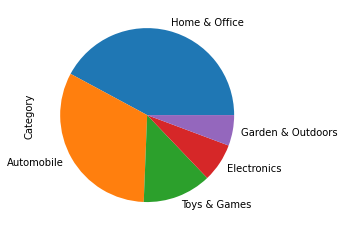

In [119]:
#Plotting the 5 categories
clean_data['Category'].value_counts()[:5].plot(kind='pie')

Q4. What 5 categories have the least number of items on offer?

In [120]:
clean_data['Category'].value_counts(ascending=True)[:5]
#or 
#clean_data['Category'].value_counts()[-5:]


Gaming                     1
Musical Instruments        2
Baby Products              4
Grocery                    6
Books, Movies and Music    8
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

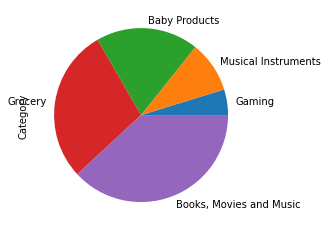

In [121]:
# Plotting the 5 last categories
clean_data['Category'].value_counts(ascending=True)[:5].plot(kind='pie')

Q5.  What is the min, max, avereage and standard deviation of offer prices?

In [122]:
clean_data[['Price','Offer']].describe()

,Price,Offer
count,1088.000000,1088.000000
mean,4992.936581,3191.073529
std,4736.983115,2888.252831
min,172.000000,86.000000
25%,1997.000000,1467.500000
50%,3495.500000,2240.500000
75%,5826.000000,3699.000000
max,29598.000000,16862.000000


Q6. How products has the max and minimum discounts?

In [123]:
max_discount=clean_data[clean_data['Discount']==clean_data['Discount'].max()]['Name'].count()
discount=clean_data['Discount'].max()
print(f'maximum discount: {discount}%\nNumber of products: {max_discount}')

maximum discount: 50%
Number of products: 300


In [124]:
min_discount=clean_data[clean_data['Discount']==clean_data['Discount'].min()]['Name'].count()
minimumd=clean_data['Discount'].min()
print(f'minimum discount: {minimumd}%\nNumber of products: {min_discount}')

minimum discount: 10%
Number of products: 1


Q7. Plot for the distribution of discounts. Is it normally distributed?

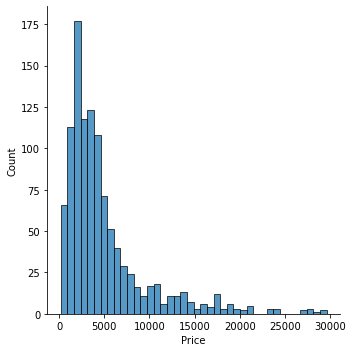

In [125]:
seaborn.displot(data=clean_data['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

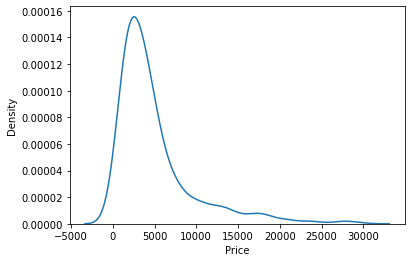

In [126]:
seaborn.kdeplot(data=clean_data['Price'])

In [127]:
clean_data['Price'].mean()

4992.936580882353

The price of products in our data set is a random variable following a normal distribution with mean 4,955

Q8 a. what is the value of all products on offer?

In [128]:
clean_data['Price'].sum()

5432315.0

Q8 b. What is the value of products in their given categories? 

In [129]:
clean_data.groupby('Category').sum()['Price']

Category
Automobile                 1042482.0
Baby Products                33419.0
Books, Movies and Music      13802.0
Computing                    35507.0
Electronics                 228526.0
Fashion                     135164.0
Gaming                        1967.0
Garden & Outdoors           467012.0
Grocery                      22358.0
Health & Beauty             198676.0
Home & Office              2375559.0
Industrial & Scientific      79353.0
Musical Instruments           6913.0
Pet Supplies                 58084.0
Phones & Tablets            151122.0
Services                     72698.0
Sporting Goods              123018.0
Toys & Games                386655.0
Name: Price, dtype: float64

<AxesSubplot:xlabel='Category'>

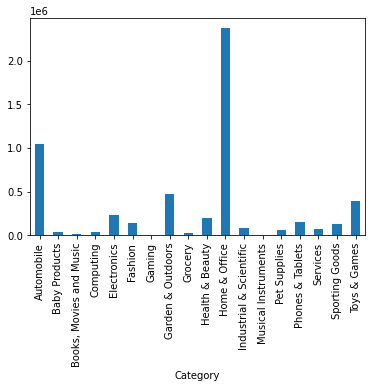

In [130]:
clean_data.groupby('Category').sum()['Price'].plot(kind='bar')